In [1]:
library(forecast)
library(car)
library(ggplot2)
#library(zoo)
library(scales)
library(repr)

options(scipen=999)

# Change plot size to 10 x 6
options(repr.plot.width=8, repr.plot.height=5)

jp_data <- read.csv2("korea_employment.csv")
#Remove last row, 2015-01
jp_data <- jp_data[1:nrow(jp_data) - 1,]
jp_data$Date <- as.Date(jp_data$Date, format = "%Y-%m-%d")
#Create column with month value
jp_data$Month <- sapply(jp_data$Date, function(x) {format(as.Date(x), "%m")})
#jp_observed_ts <- zoo(jp_data)

head(jp_data)

Warning message:
: package 'forecast' was built under R version 3.2.5Loading required package: zoo
Warning message:
: package 'zoo' was built under R version 3.2.5
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
Warning message:
: package 'timeDate' was built under R version 3.2.3This is forecast 7.1 

Warning message:
: package 'car' was built under R version 3.2.5Warning message:
: package 'ggplot2' was built under R version 3.2.5Warning message:
: package 'scales' was built under R version 3.2.5

,Date,Value,Month
1,2002-01-01,61.66093,01
2,2002-02-01,61.8195,02
3,2002-03-01,62.52377,03
4,2002-04-01,63.69807,04
5,2002-05-01,64.00784,05
6,2002-06-01,64.10573,06


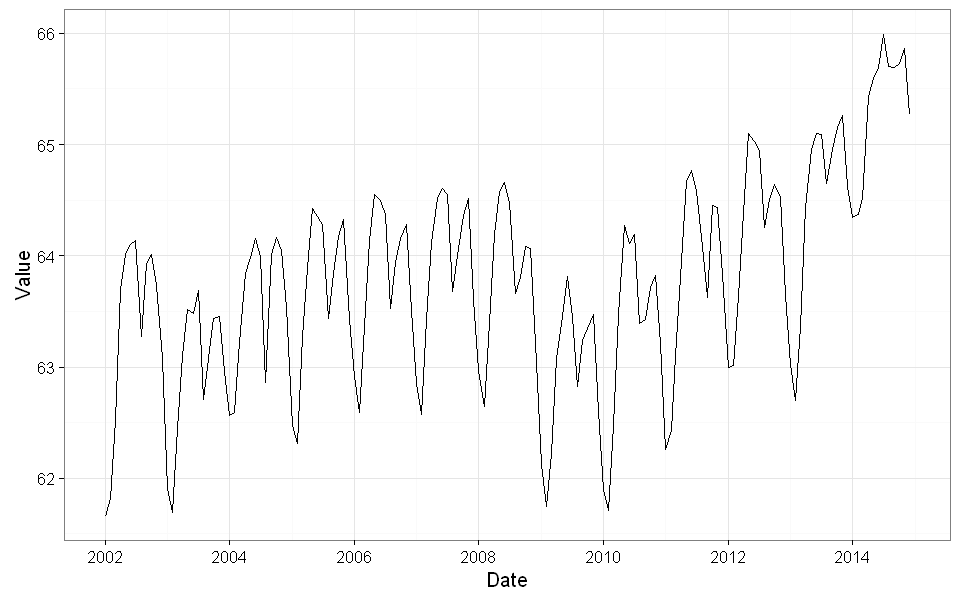

In [2]:
ggplot(jp_data, aes(group = 1)) +
    geom_line(aes(x = Date, y = Value)) +
    theme_bw()

Säsongsrensa före trendanalys


In [3]:
jp_ts <- ts(jp_data$Value, start = 2002, frequency = 12)
jp_data$Seasonal_comp <- decompose(jp_ts, "additive")$seasonal
jp_data$Dt <- jp_data$Value - as.numeric(jp_data$Seasonal_comp)

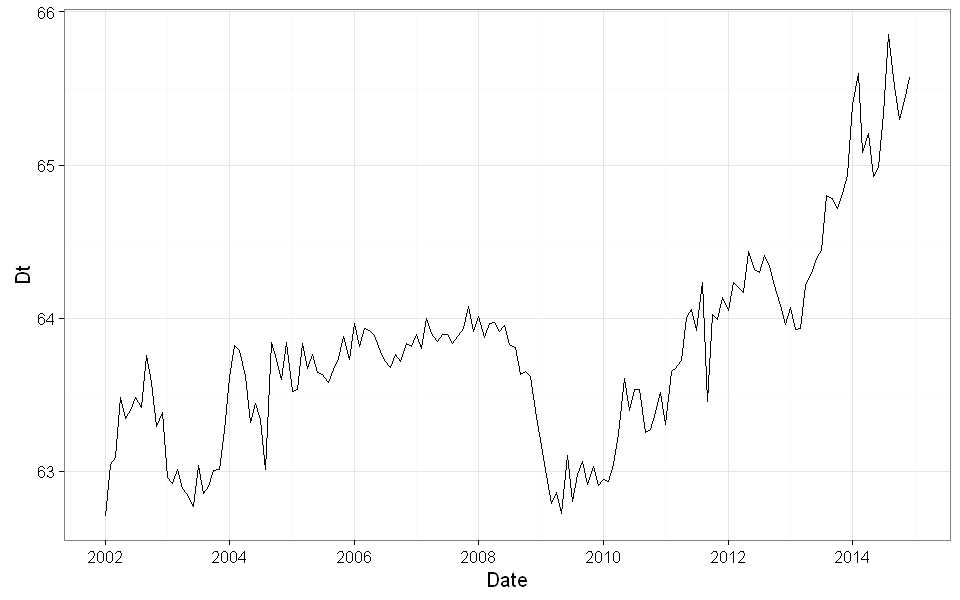

In [4]:
ggplot(jp_data, aes(group = 1)) +
    geom_line(aes(x = Date, y = Dt)) +
    theme_bw()

Testa anpassa polynom 3/5/7


Call:
lm(formula = jp_data$Dt ~ poly(index(jp_data), 3, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76434 -0.26713  0.06387  0.25250  0.60836 

Coefficients:
                                          Estimate    Std. Error t value
(Intercept)                          62.7628748366  0.1077062411 582.723
poly(index(jp_data), 3, raw = TRUE)1  0.0497701137  0.0059222137   8.404
poly(index(jp_data), 3, raw = TRUE)2 -0.0008282740  0.0000875017  -9.466
poly(index(jp_data), 3, raw = TRUE)3  0.0000040547  0.0000003664  11.066
                                                 Pr(>|t|)    
(Intercept)                          < 0.0000000000000002 ***
poly(index(jp_data), 3, raw = TRUE)1   0.0000000000000287 ***
poly(index(jp_data), 3, raw = TRUE)2 < 0.0000000000000002 ***
poly(index(jp_data), 3, raw = TRUE)3 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3283 on 152 degrees of freedom
Multiple R

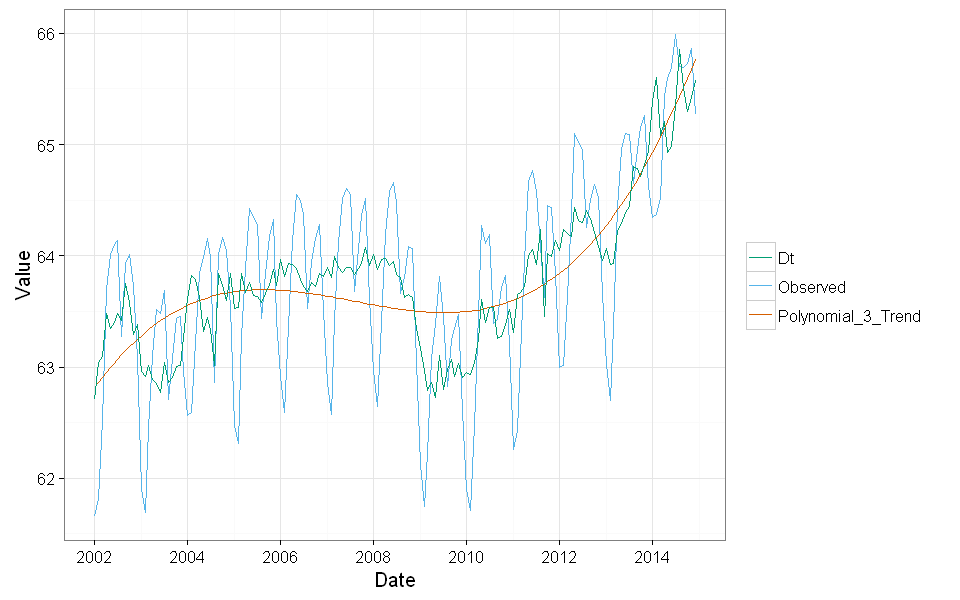

In [5]:
jp_pol_3_model <- lm(jp_data$Dt ~ poly(index(jp_data), 3, raw = TRUE))
summary(jp_pol_3_model)
jp_data$Pol_3_Fit <- jp_pol_3_model$fitted

ggplot(jp_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Pol_3_Fit, color="Polynomial_3_Trend")) +
    geom_line(aes(x = Date, y = Dt, color="Dt")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Polynomial_3_Trend="#D55E00", Dt="#009E73")) +
    theme_bw()


Call:
lm(formula = jp_data$Dt ~ poly(index(jp_data), 5, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68018 -0.19329  0.00092  0.22298  0.64022 

Coefficients:
                                             Estimate       Std. Error t value
(Intercept)                          63.4241707486143  0.1476332086426 429.606
poly(index(jp_data), 5, raw = TRUE)1 -0.0646881217744  0.0187884415353  -3.443
poly(index(jp_data), 5, raw = TRUE)2  0.0039980848415  0.0007356868524   5.434
poly(index(jp_data), 5, raw = TRUE)3 -0.0000748093629  0.0000118381647  -6.319
poly(index(jp_data), 5, raw = TRUE)4  0.0000005490035  0.0000000830180   6.613
poly(index(jp_data), 5, raw = TRUE)5 -0.0000000013677  0.0000000002105  -6.498
                                                 Pr(>|t|)    
(Intercept)                          < 0.0000000000000002 ***
poly(index(jp_data), 5, raw = TRUE)1             0.000746 ***
poly(index(jp_data), 5, raw = TRUE)2       0.000000217522 ***
poly(index

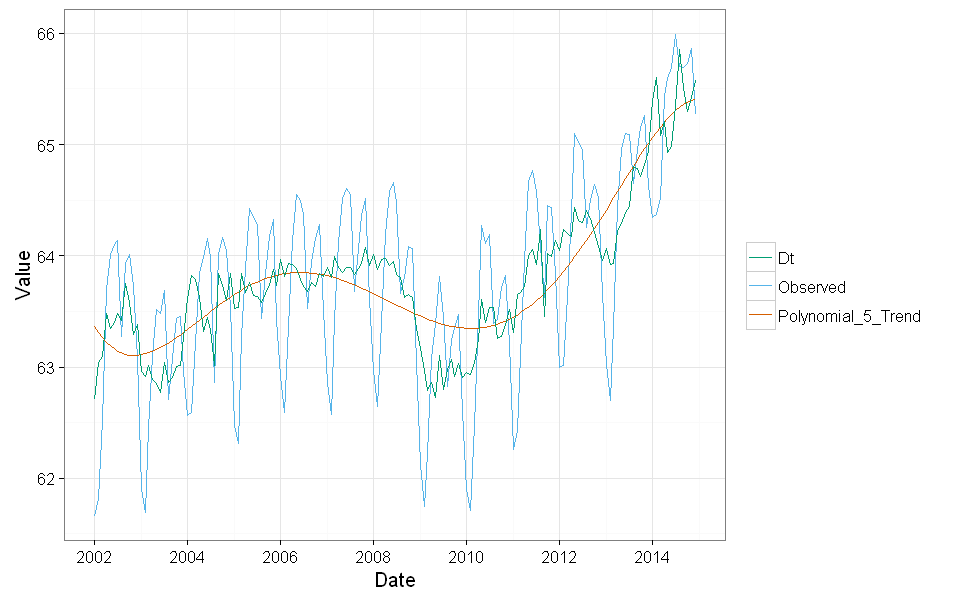

In [6]:
jp_pol_5_model <- lm(jp_data$Dt ~ poly(index(jp_data), 5, raw = TRUE))
summary(jp_pol_5_model)
jp_data$Pol_5_Fit <- jp_pol_5_model$fitted

ggplot(jp_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Pol_5_Fit, color="Polynomial_5_Trend")) +
    geom_line(aes(x = Date, y = Dt, color="Dt")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Polynomial_5_Trend="#D55E00", Dt="#009E73")) +
    theme_bw()


Call:
lm(formula = jp_data$Dt ~ poly(index(jp_data), 6, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.75284 -0.18867 -0.00559  0.20912  0.67241 

Coefficients:
                                               Estimate         Std. Error
(Intercept)                          63.552771684141824  0.175555275929135
poly(index(jp_data), 6, raw = TRUE)1 -0.097019313682698  0.030477466269834
poly(index(jp_data), 6, raw = TRUE)2  0.006018033294998  0.001671390609853
poly(index(jp_data), 6, raw = TRUE)3 -0.000125856185520  0.000039744981085
poly(index(jp_data), 6, raw = TRUE)4  0.000001156450725  0.000000459135525
poly(index(jp_data), 6, raw = TRUE)5 -0.000000004768023  0.000000002536693
poly(index(jp_data), 6, raw = TRUE)6  0.000000000007219  0.000000000005367
                                     t value             Pr(>|t|)    
(Intercept)                          362.010 < 0.0000000000000002 ***
poly(index(jp_data), 6, raw = TRUE)1  -3.183             0.001773 ** 
p

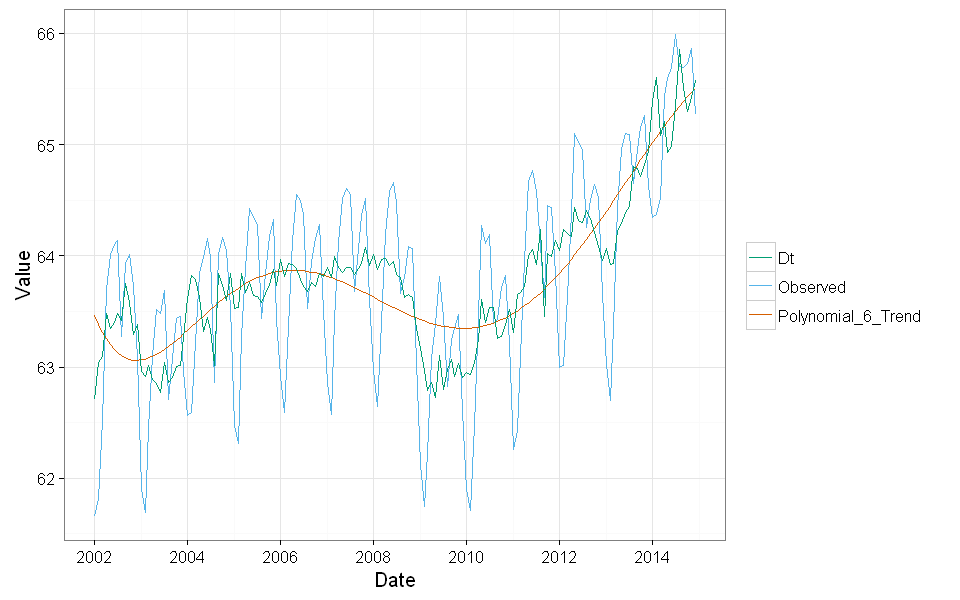

In [7]:
jp_pol_6_model <- lm(jp_data$Dt ~ poly(index(jp_data), 6, raw = TRUE))
summary(jp_pol_6_model)
jp_data$Pol_6_Fit <- jp_pol_6_model$fitted

ggplot(jp_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Pol_6_Fit, color="Polynomial_6_Trend")) +
    geom_line(aes(x = Date, y = Dt, color="Dt")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Polynomial_6_Trend="#D55E00", Dt="#009E73")) +
    theme_bw()

Residualanalys på 5 och 6

[1] 0.5237662

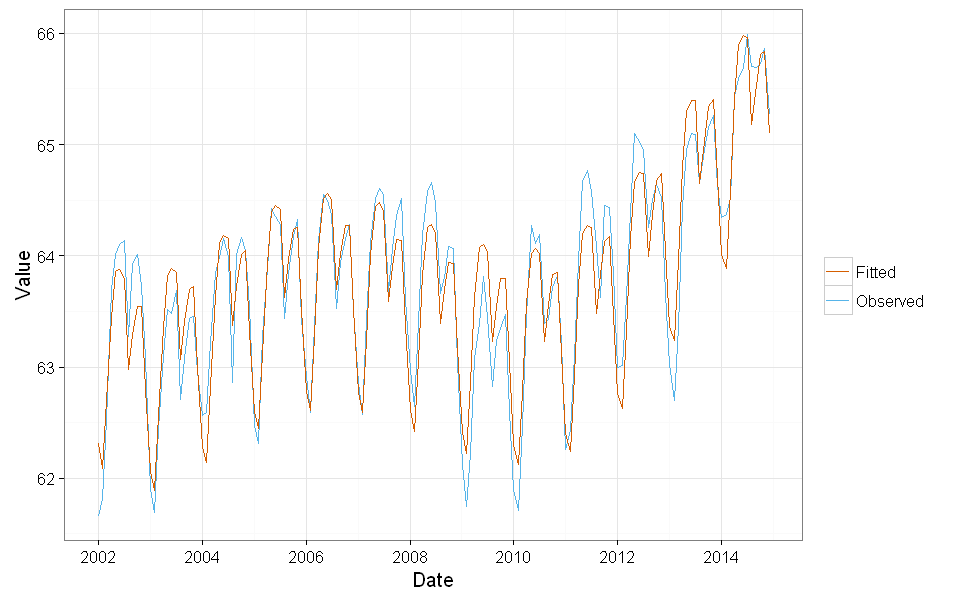

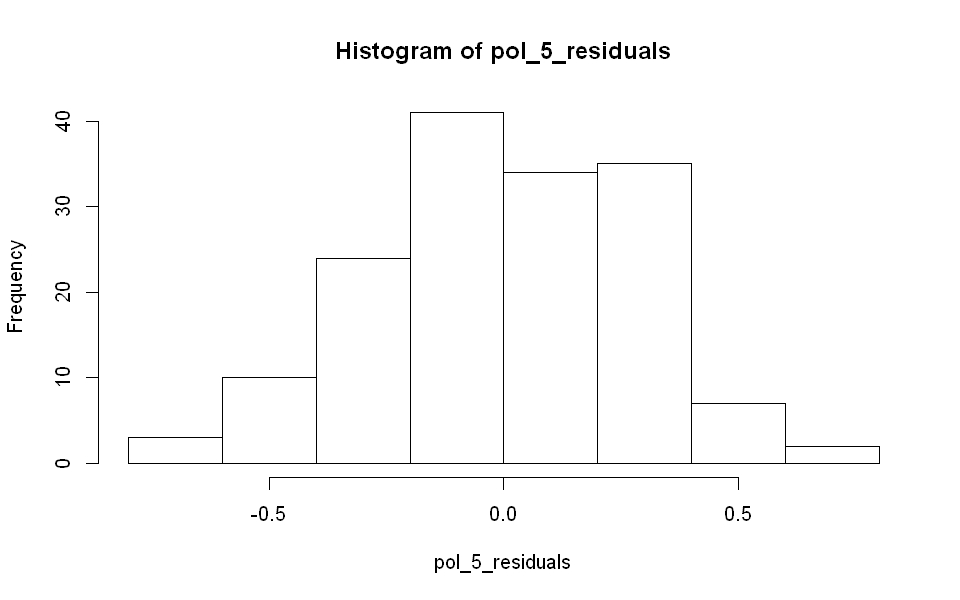

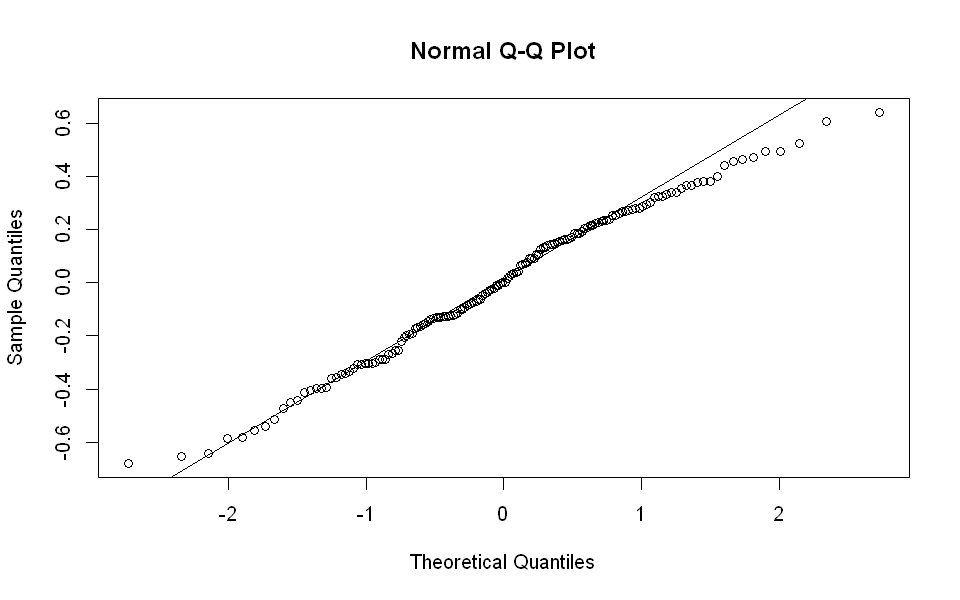

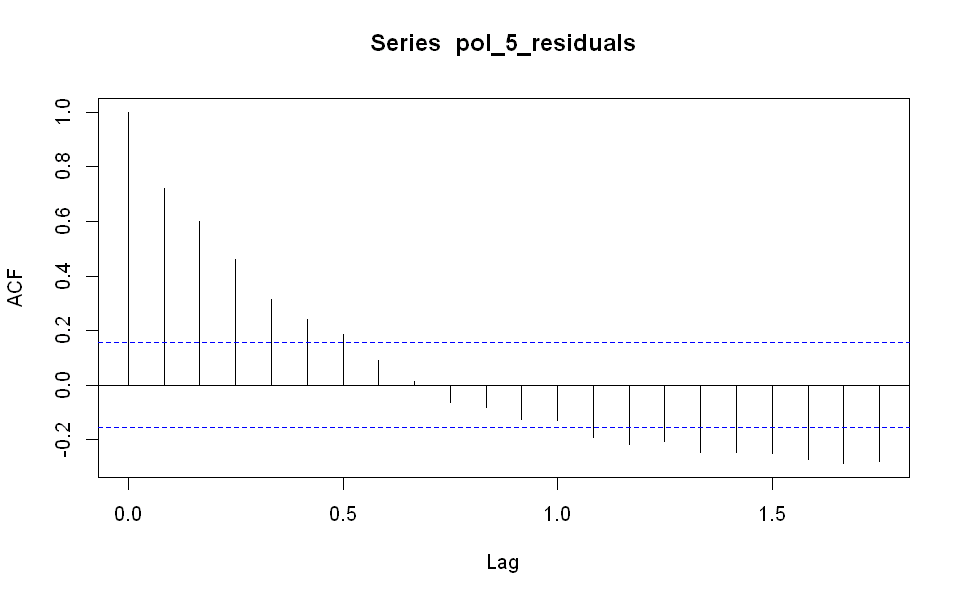

In [8]:
pol_5_residuals <- jp_data$Value - (jp_data$Pol_5_Fit + jp_data$Seasonal_comp)
durbinWatsonTest(as.numeric(pol_5_residuals))


temp_data <- data.frame(Date = jp_data$Date, Value = jp_data$Value, Fitted = (jp_data$Pol_5_Fit + jp_data$Seasonal_comp))
ggplot(temp_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Fitted, color="Fitted")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Fitted="#D55E00")) +
    theme_bw()

hist(pol_5_residuals)
qqnorm(pol_5_residuals)
qqline(pol_5_residuals)
acf(pol_5_residuals)

[1] 0.5329706

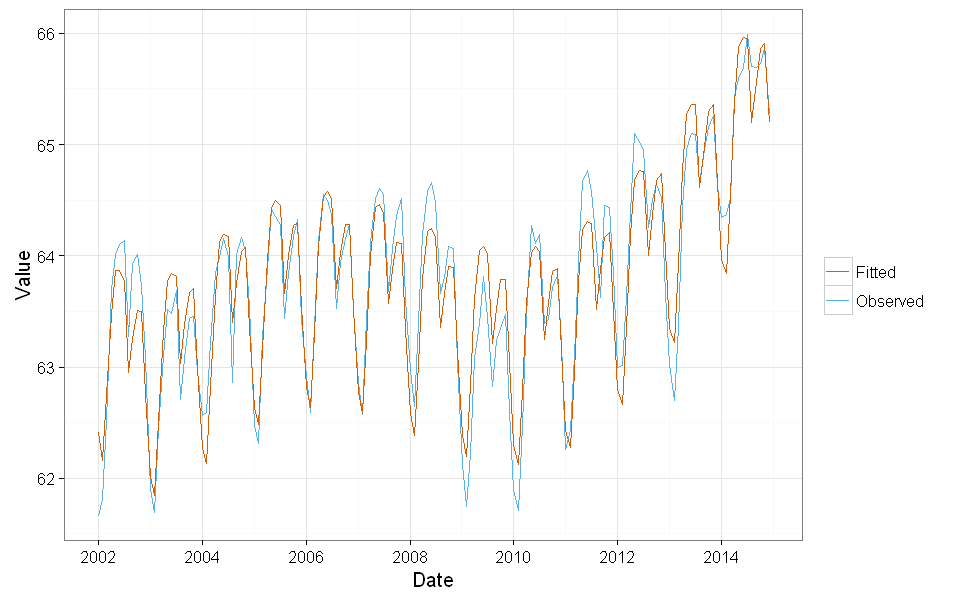

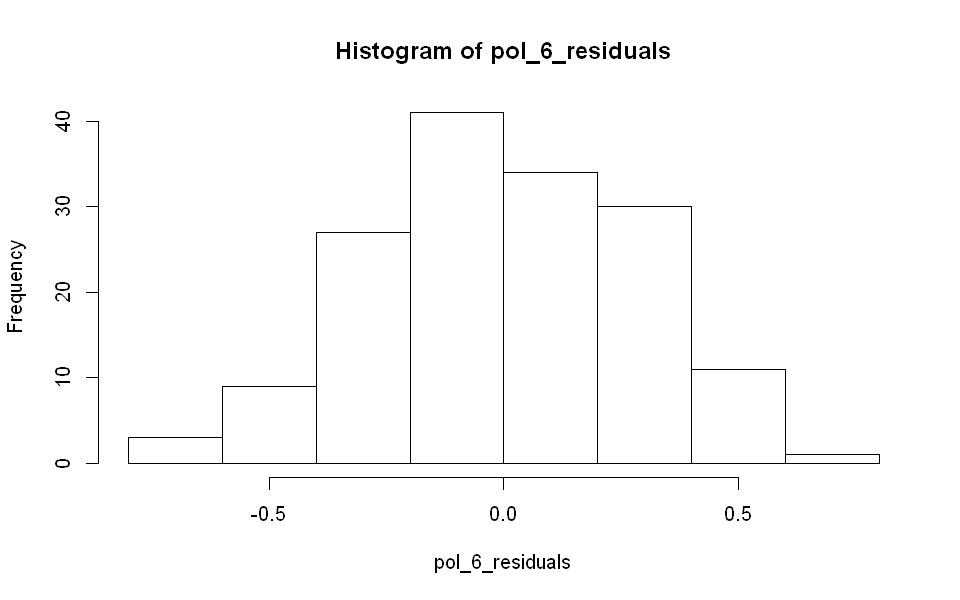

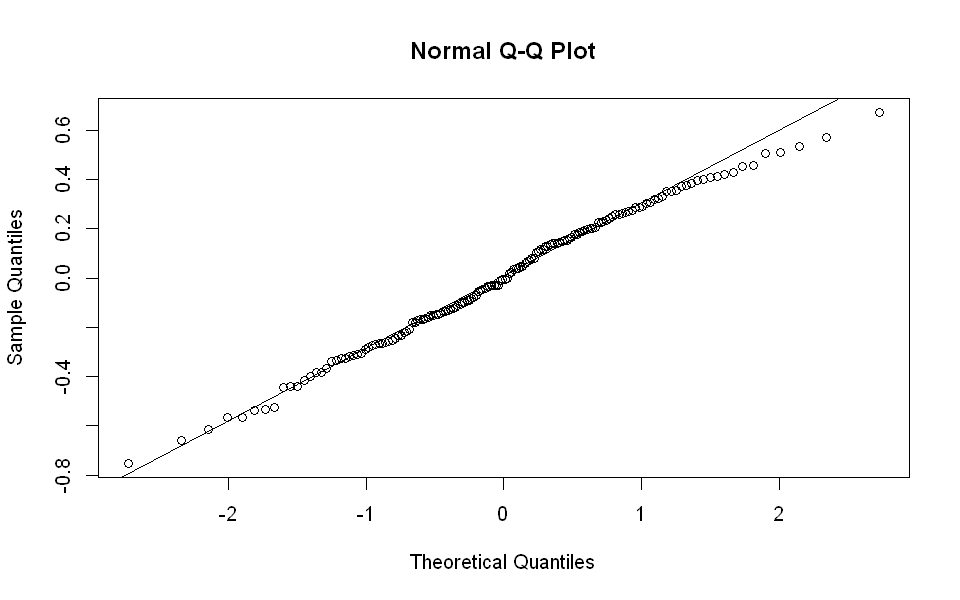

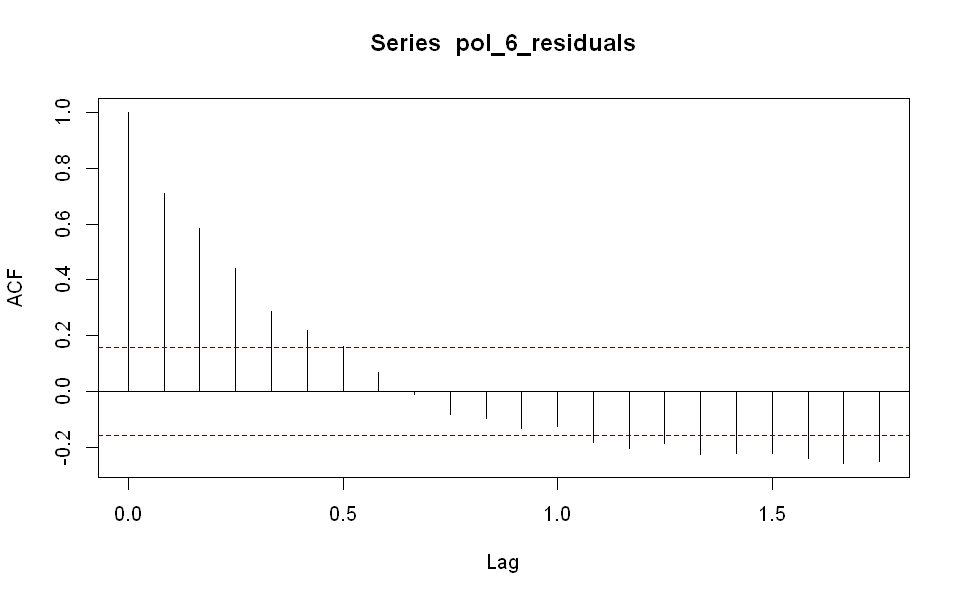

In [9]:

pol_6_residuals <- jp_data$Value - (jp_data$Pol_6_Fit + jp_data$Seasonal_comp)
durbinWatsonTest(as.numeric(pol_6_residuals))


temp_data <- data.frame(Date = jp_data$Date, Value = jp_data$Value, Fitted = (jp_data$Pol_6_Fit + jp_data$Seasonal_comp))
ggplot(temp_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Fitted, color="Fitted")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Fitted="#D55E00")) +
    theme_bw()

hist(pol_6_residuals)
qqnorm(pol_6_residuals)
qqline(pol_6_residuals)
acf(pol_6_residuals)

Holt


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(x = jp_data$Dt, h = 12, alpha = 0.65, beta = 0.15, gamma = FALSE) 

  Smoothing parameters:
    alpha = 0.65 
    beta  = 0.15 

  Initial states:
    l = 62.7075 
    b = 0.112 

  sigma:  0.2101

     AIC     AICc      BIC 
304.9330 305.0115 311.0328 

Error measures:
                       ME      RMSE       MAE          MPE      MAPE     MASE
Training set -0.003124651 0.2100522 0.1550845 -0.005240637 0.2428438 1.002807
                   ACF1
Training set 0.04181402

Forecasts:
    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
157       65.57045 65.30126 65.83964 65.15876 65.98215
158       65.60930 65.23800 65.98060 65.04145 66.17716
159       65.64815 65.17324 66.12307 64.92183 66.37448
160       65.68700 65.10496 66.26904 64.79685 66.57716
161       65.72585 65.03245 66.41925 64.66539 66.78632
162       65.76470 64.95544 66.57396 64.52705 67.00236
163       65.80355 64.87386 66.73324 64.38172 67

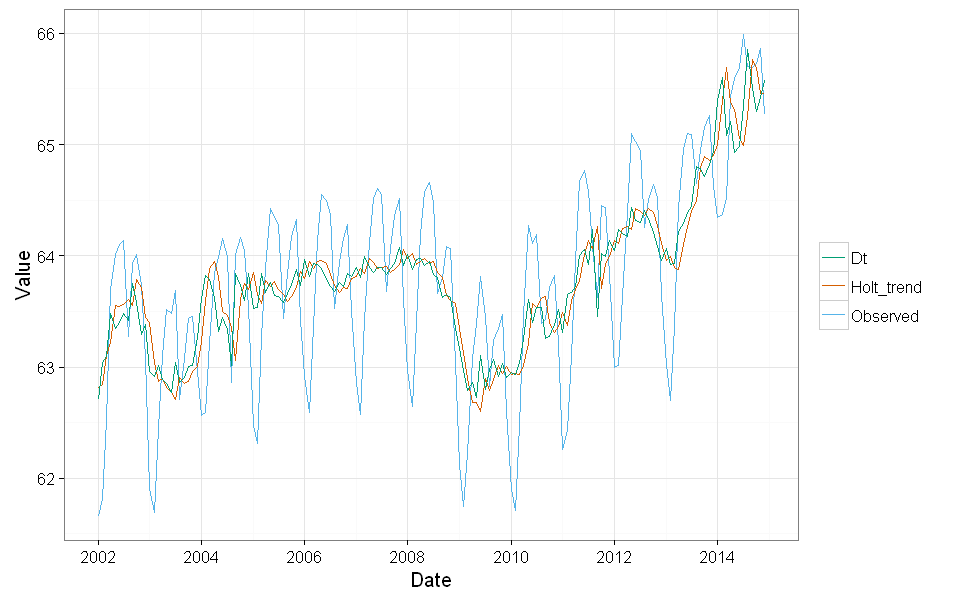

In [16]:
jp_holt_model <- holt(jp_data$Dt, h=12, alpha = 0.65, beta = 0.15, gamma = FALSE)
summary(jp_holt_model)
jp_data$Holt_Fit <- as.numeric(jp_holt_model$fit)

ggplot(jp_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Holt_Fit, color="Holt_trend")) +
    geom_line(aes(x = Date, y = Dt, color="Dt")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Holt_trend="#D55E00", Dt="#009E73")) +
    theme_bw()

Residualanalys Holt

[1] 1.912098

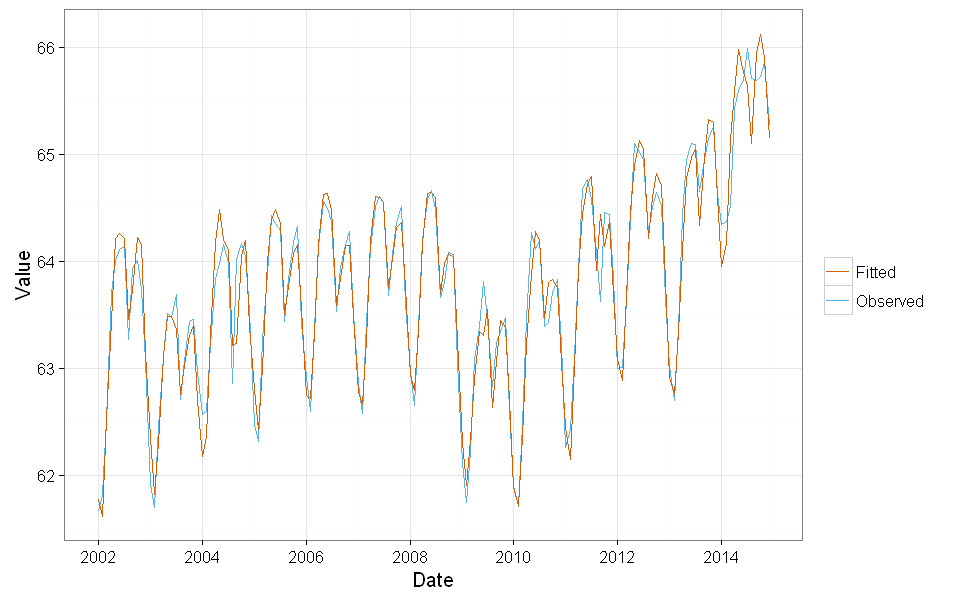

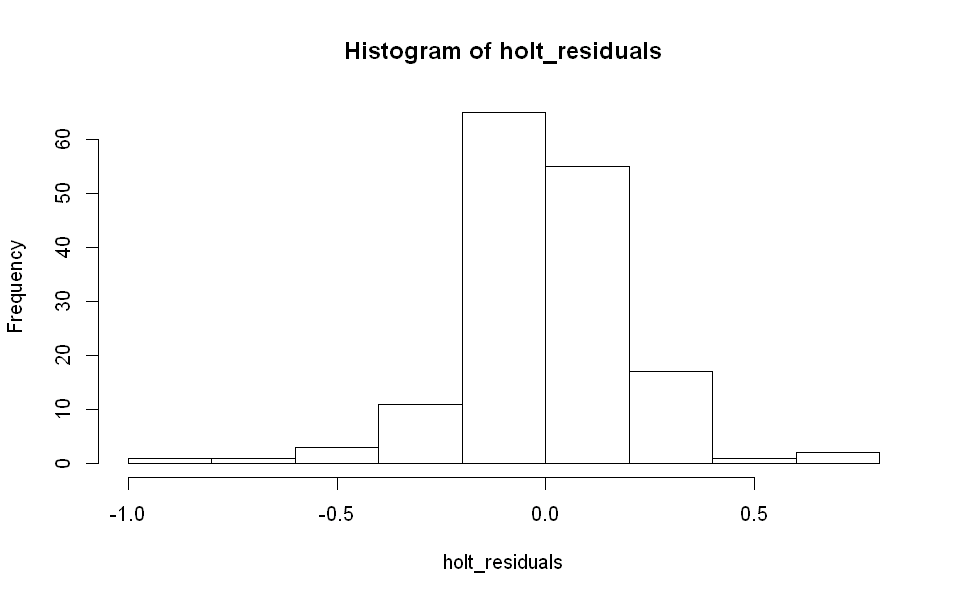

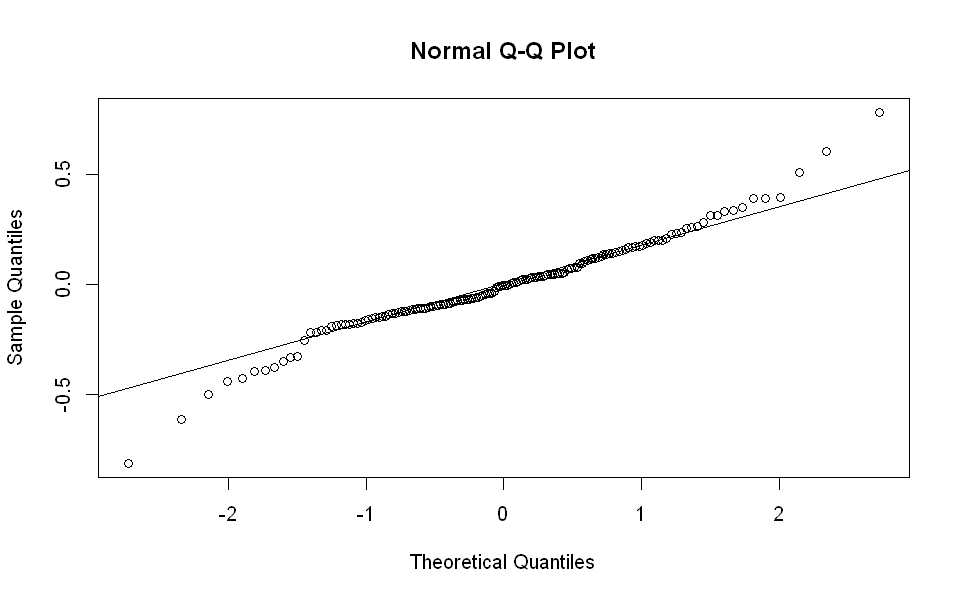

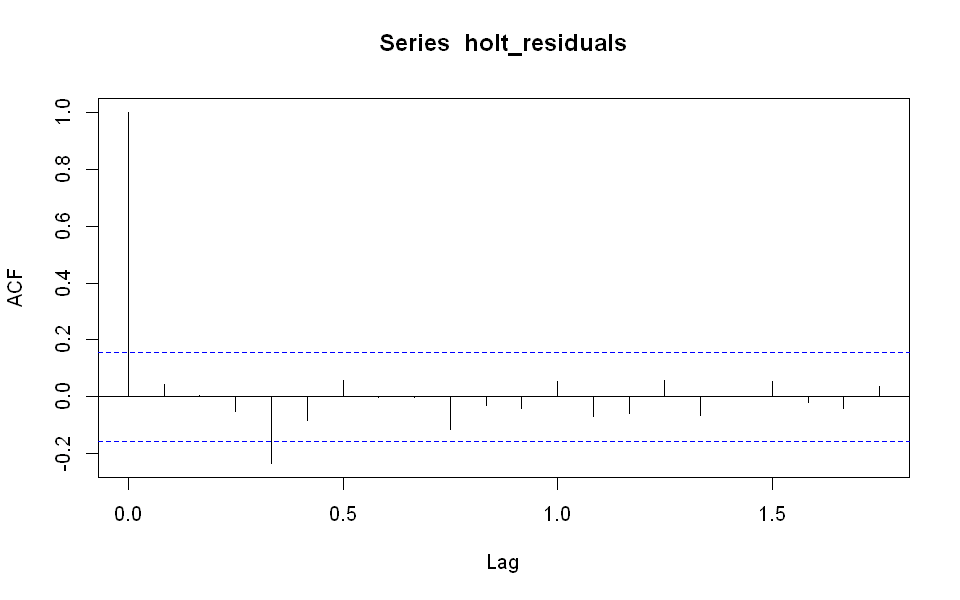

In [17]:
holt_residuals <- jp_data$Value - (jp_data$Holt_Fit + jp_data$Seasonal_comp)

durbinWatsonTest(as.numeric(holt_residuals))

temp_data <- data.frame(Date = jp_data$Date, Value = jp_data$Value, Fitted = (jp_data$Holt_Fit + jp_data$Seasonal_comp))

ggplot(temp_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = Fitted, color="Fitted")) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Fitted="#D55E00")) +
    theme_bw()

hist(holt_residuals)
qqnorm(holt_residuals)
qqline(holt_residuals)
acf(holt_residuals)

Prognos 12 månader framåt

Warning message:
: Removed 12 rows containing missing values (geom_path).

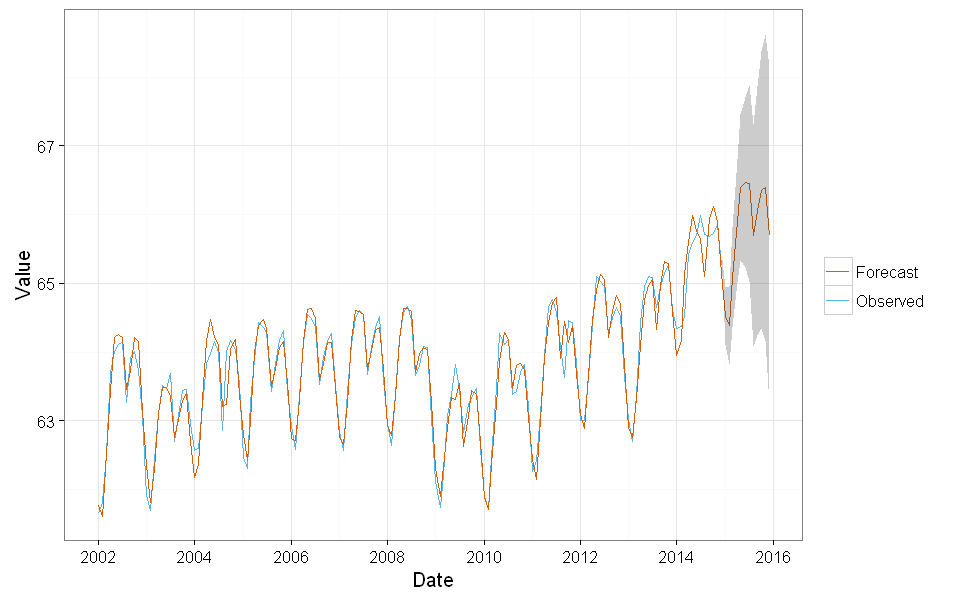

In [22]:
forecast_mean <- jp_holt_model$mean
forecast_high <- jp_holt_model$lower[,2] + jp_data$Seasonal_comp[1:12]
forecast_low <- jp_holt_model$upper[,2] + jp_data$Seasonal_comp[1:12]


predict_data <- data.frame(Date = c(jp_data$Date, seq(as.Date("2015-01-01"), by = "month", length.out = 12)),
                        Value = c(jp_data$Value, rep(NA, 12)),
                        Forecast = c(jp_data$Holt_Fit, forecast_mean),
                        Forecast_low = c(jp_data$Holt_Fit, forecast_low),
                        Forecast_high = c(jp_data$Holt_Fit, forecast_high),
                          Seasonal_comp = c(jp_data$Seasonal_comp, jp_data$Seasonal_comp[1:12]))
#predict_data

ggplot(predict_data, aes()) +
    geom_line(aes(x = Date, y = Value, color="Observed")) +
    geom_line(aes(x = Date, y = (Forecast + Seasonal_comp), color="Forecast")) +
    geom_ribbon(aes(x = Date, ymin=Forecast_low, ymax=Forecast_high), alpha=.25) +
    scale_colour_manual(name="", values=c(Observed="#56B4E9", Forecast="#D55E00")) +
    theme_bw()

In [19]:
holt_forecast <- data.frame(Date = seq(as.Date("2015-01-01"), by = "month", length.out = 12),
                           Low_95 = forecast_low,
                           Mean = forecast_mean,
                           High_95 = forecast_high)

holt_forecast

,Date,Low_95,Mean,High_95
1,2015-01-01,64.93427,64.52258,64.11088
2,2015-02-01,64.95228,64.38442,63.81656
3,2015-03-01,65.80762,65.08129,64.35497
4,2015-04-01,66.79601,65.90586,65.0157
5,2015-05-01,67.4515,66.39103,65.33057
6,2015-06-01,67.71112,66.47346,65.23581
7,2015-07-01,67.87911,66.45727,65.03543
8,2015-08-01,67.30559,65.69261,64.07963
9,2015-09-01,67.867,66.05601,64.24502
10,2015-10-01,68.37005,66.35432,64.33859
